<a href="https://colab.research.google.com/github/anbubus/deeplearning_ocean/blob/main/firts_test_deeplearning_ocean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow
# Keras
# Redes Neurais
print("Hello World")
num = 20
print(num)
lista = [12, 12, 23]
print(lista, type(lista))

Hello World
20
[12, 12, 23] <class 'list'>


In [2]:
from tensorflow import keras # Importa a biblioteca Keras
from keras.datasets import mnist # Base de Dados MNIST 
from tensorflow.python.keras import Sequential # Arquitetura da nossa rede neural
from tensorflow.python.keras.layers import Dense, Dropout # Neurônio (base da rede) e Regularizador (evita overfitting)
from tensorflow.compat.v1.keras.optimizers import RMSprop # Otimizador (back propagation)

In [3]:
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

# X_Treino -> 60k imagens, 28x28 pixels
# Y_Treino -> 60k labels, contendo o número que está desenhado na imagem

# X_Teste -> 10k imagens, 28x28 pixels
# Y_Teste -> 10k labels, contendo o número que está desenhado na imagem


In [4]:
# Após importar os dados, é importante dar uma analisada para ver o que temos no dataset
# e como ele está estruturado

print("Quantidade de imagens para treino:", len(x_treino))

print("Quantidade de imagens para teste:", len(x_teste))

print("Tipo de x_treino:", type(x_treino))

primeira_imagem = x_treino[0]

representacao_primeira_imagem = y_treino[0]

print("O que a imagem 0 de treino representa?", representacao_primeira_imagem)

print("Formato da primeira imagem:", primeira_imagem.shape, type(primeira_imagem))

print(primeira_imagem)

Quantidade de imagens para treino: 60000
Quantidade de imagens para teste: 10000
Tipo de x_treino: <class 'numpy.ndarray'>
O que a imagem 0 de treino representa? 5
Formato da primeira imagem: (28, 28) <class 'numpy.ndarray'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253

A imagem representa: 5


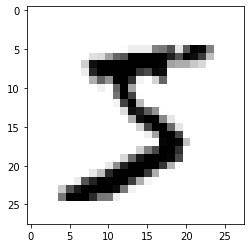

In [5]:
import matplotlib.pyplot as plt

indice = 0

print("A imagem representa:", y_treino[indice])

plt.imshow(x_treino[indice], cmap=plt.cm.binary)

In [6]:
#Achatando a matrix de pixels e transformando em uma unica lista

quantidade_treino = len(x_treino)
quantidade_teste = len(x_teste)

resolucao_imagem = x_treino[0].shape
resolucao_total = resolucao_imagem[0] * resolucao_imagem[1]

x_treino = x_treino.reshape(quantidade_treino, resolucao_total)
x_teste = x_teste.reshape(quantidade_teste, resolucao_total)

In [7]:
print("Quantidade de items em x_trieno[0]: ", len(x_treino[0]))
print(x_treino[0])

Quantidade de items em x_trieno[0]:  784
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 2

In [8]:
# Normalização de dados

# 255 vire 1
# 127 vire 0.5
# 0 vire 0
# E assim por diante

# Posso pegar o meu valor que eu quero transformar e dividir pelo valor máximo do meu intervalo
# Exemplo, se eu dividir 255 por 255, tenho 1
# Exemplo, se eu dividir 127 por 255, tenho ~0.5
# Exemplo, se eu dividir 0 por 255, tenho 0

"""
# Explicando o porque da conversão de tipos

primeira_imagem = x_treino[0]
primeiro_pixel = primeira_imagem[0] # uint8

# Quando eu divido uint8 por algum número, recebemos um float64
# Porém, o tensorflow precisa de float32 para trabalhar
# Portanto, precisamos converter o tipo antes de dividí-lo

print(primeiro_pixel, type(primeiro_pixel / 255)) # float64

# Fim da explicação
"""


'\n# Explicando o porque da conversão de tipos\n\nprimeira_imagem = x_treino[0]\nprimeiro_pixel = primeira_imagem[0] # uint8\n\n# Quando eu divido uint8 por algum número, recebemos um float64\n# Porém, o tensorflow precisa de float32 para trabalhar\n# Portanto, precisamos converter o tipo antes de dividí-lo\n\nprint(primeiro_pixel, type(primeiro_pixel / 255)) # float64\n\n# Fim da explicação\n'

In [9]:
x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')

x_treino /= 255
x_teste /= 255

In [10]:
print(x_treino[0][350], type(x_treino[0][350]))
print(x_treino[0])

0.27450982 <class 'numpy.float32'>
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.       

In [11]:
# Preparação da camada de saída

# Quais são as possibilidades de saída? Números de 0 a 9
# Atualmente, nas labels, temos: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
# Transformaremos para o formato da camada de saída: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# Sendo que cada número possui valor 1 na posição que corresponde a esse número
# Exemplo:
# Número 5 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# Número 9 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
# Número 0 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

print("Primeiro elemento:", y_treino[0], type(y_treino[0]))

valores_unicos = set(y_treino)

print("Valores únicos:", valores_unicos)

quantidade_valores_unicos = len(valores_unicos) # 10

# Transformação de valores inteiros em valores categóricos

print("y_treino[0] antes:", y_treino[0])

y_treino = keras.utils.to_categorical(y_treino, quantidade_valores_unicos)
y_teste = keras.utils.to_categorical(y_teste, quantidade_valores_unicos)

print("y_treino[0] depois:", y_treino[0])


Primeiro elemento: 5 <class 'numpy.uint8'>
Valores únicos: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
y_treino[0] antes: 5
y_treino[0] depois: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
# Criando o modelo da rede neural
model = Sequential()
model.add(Dense(30, activation = 'relu', input_shape = (resolucao_total,)))

# Adicionmas um regularizador, para ajudar a evitar o overfiting
# Overfitting = quando a rede aprende a resolver aquela base específica, mas não abstrai o problema
model.add(Dropout(0.2))

model.add(Dense(20, activation = 'relu'))

# Mais um regularizador
model.add(Dropout(0.2))

model.add(Dense(quantidade_valores_unicos, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [14]:
#compila e treina o modelo

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_treino, y_treino,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_teste, y_teste))

Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.8871 - accuracy: 0.7288 - val_loss: 0.3289 - val_accuracy: 0.9083
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4797 - accuracy: 0.8582 - val_loss: 0.2600 - val_accuracy: 0.9241
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4034 - accuracy: 0.8845 - val_loss: 0.2334 - val_accuracy: 0.9319
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3655 - accuracy: 0.8950 - val_loss: 0.2128 - val_accuracy: 0.9361
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3384 - accuracy: 0.9034 - val_loss: 0.1957 - val_accuracy: 0.9434
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3193 - accuracy: 0.9080 - val_loss: 0.1913 - val_accuracy: 0.9437
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3117 - accuracy: 0.9104 - val_loss: 0.1850 - val_accuracy: 0.9471
Epoch 

Valor categórico em y_teste[indice]: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

Previsão: [[6.6609381e-08 2.1105997e-08 5.7926758e-05 2.0055480e-04 1.6805139e-11
  1.6463002e-08 3.7420683e-15 9.9973804e-01 3.5985259e-08 3.3569247e-06]]
Previsão ajustada: [7]



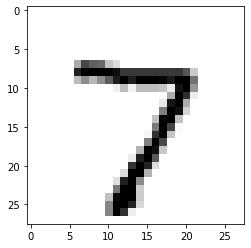

In [15]:
# Fazendo novas previsões

indice = 0

print("Valor categórico em y_teste[indice]:", y_teste[indice])

# Preparo a imagem para fazer a previsão
imagem = x_teste[indice].reshape((1, resolucao_total))

print()

# Faço a previsão
prediction = model.predict(imagem)
print("Previsão:", prediction)

# Traduzindo a previsão em algo mais legível
import numpy as np
prediction_class = np.argmax(prediction, axis=-1)
print("Previsão ajustada:", prediction_class)

print()

# Carregar os dados originais novamente para exibir como imagem
(x_treino_img, y_treino_img), (x_teste_img, y_teste_img) = mnist.load_data()
plt.imshow(x_teste_img[indice], cmap=plt.cm.binary)